In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

#transformando categorias em numéricas
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

#separando para o teste
from sklearn.model_selection import train_test_split

#arvore
from sklearn import tree

#metrica
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("drug200.csv")

x = df.drop(labels='Drug', axis=1)
y = df['Drug']

In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
preprocessador = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=object))])

x_pre = preprocessador.fit_transform(x)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_pre, y, random_state=0,test_size=0.25)

In [ ]:
classificador_gini = tree.DecisionTreeClassifier(criterion='gini')
classificador_ent = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [ ]:
classificador_ent.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

[Text(0.41304347826086957, 0.9, 'Sex <= 0.5\ngini = 0.71\nsamples = 150\nvalue = [18, 15, 13, 38, 66]\nclass = drugY'),
 Text(0.17391304347826086, 0.7, 'Age <= 0.5\ngini = 0.642\nsamples = 61\nvalue = [18, 15, 0, 0, 28]\nclass = drugY'),
 Text(0.08695652173913043, 0.5, 'BP <= 0.5\ngini = 0.574\nsamples = 31\nvalue = [7, 6, 0, 0, 18]\nclass = drugY'),
 Text(0.043478260869565216, 0.3, 'gini = 0.594\nsamples = 16\nvalue = [6, 2, 0, 0, 8]\nclass = drugY'),
 Text(0.13043478260869565, 0.3, 'gini = 0.48\nsamples = 15\nvalue = [1, 4, 0, 0, 10]\nclass = drugY'),
 Text(0.2608695652173913, 0.5, 'BP <= 0.5\ngini = 0.664\nsamples = 30\nvalue = [11, 9, 0, 0, 10]\nclass = drugA'),
 Text(0.21739130434782608, 0.3, 'gini = 0.667\nsamples = 15\nvalue = [5, 5, 0, 0, 5]\nclass = drugA'),
 Text(0.30434782608695654, 0.3, 'gini = 0.658\nsamples = 15\nvalue = [6, 4, 0, 0, 5]\nclass = drugA'),
 Text(0.6521739130434783, 0.7, 'Sex <= 1.5\ngini = 0.614\nsamples = 89\nvalue = [0, 0, 13, 38, 38]\nclass = drugX'),
 T

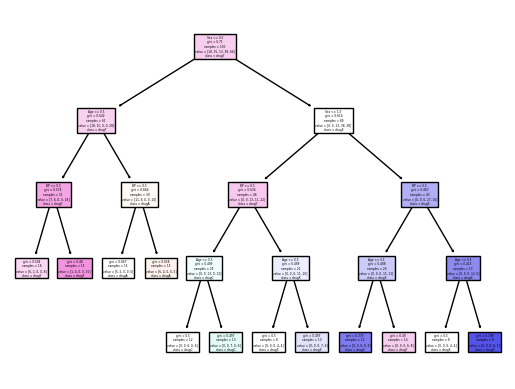

In [ ]:
#opcional
tree.plot_tree(
    classificador_gini,
    feature_names = x.columns,
    class_names = classificador_gini.classes_,
    filled=True
)

In [ ]:
resp_treino_gini = classificador_gini.predict(x_treino)

display("Acurrancy Trainning Gini: ", accuracy_score(y_treino, resp_treino_gini))

'Acurrancy Trainning Gini: '

0.5466666666666666

In [ ]:
resp_treino_ent = classificador_ent.predict(x_treino)

display("Acurrancy Trainning Entropy: ", accuracy_score(y_treino, resp_treino_ent))

'Acurrancy Trainning Entropy: '

0.5466666666666666